<a href="https://colab.research.google.com/github/MurtazaMister/ML/blob/master/ML_Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

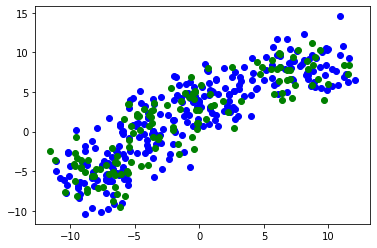

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y, z = make_blobs(n_samples=400, centers=4, n_features=2, 
                  cluster_std=2, random_state=3, return_centers=True)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=3)

for ele in X_train:
  plt.scatter(ele[0], ele[1], c='blue')

for ele in X_test:
  plt.scatter(ele[0], ele[1], c='green')

plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4, max_iter = 100, init="random")
               #verbose=1)

model.fit(X_train)

KMeans(init='random', max_iter=100, n_clusters=4)

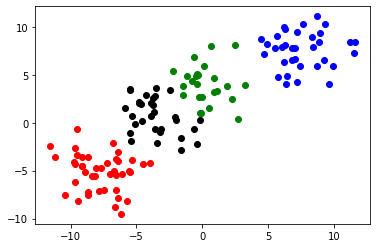

In [ ]:
colors = ['red', 'blue', 'green', 'black']
count = 0
# for x,y in model.cluster_centers_:
#   plt.scatter(x,y, c=colors[count])
#   count = count+1

predictions = model.predict(X_test)

for i in range(len(predictions)):
  plt.scatter(X_test[i][0],X_test[i][1], c = colors[predictions[i]])

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X_test, predictions)

0.5045447720583869

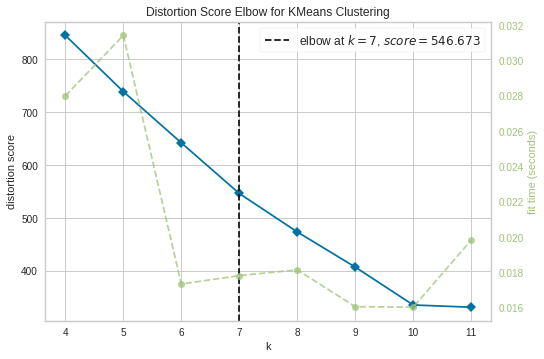

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X_test)     
visualizer.show()

# Hand written digit recognition

In [ ]:
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits()
digits.target, digits.target_names, digits.images

(array([0, 1, 2, ..., 8, 9, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
         [ 0.,  0.,  3., ..., 14.,  0.,  0.],
         [ 0.,  0.,  8., ..., 16.,  0.,  0.],
         ...,
         [ 0.,  9., 16., ...,  0.,  0.,  0.],
         [ 0.,  3., 13., ..., 11.,  5.,  0.],
         [ 0.,  0.,  0., ..., 16.,  9.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  1., ...,  1.

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

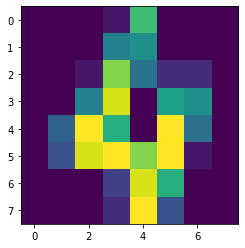

In [ ]:
sample_digit = digits.data[4].reshape(8,8)
plt.imshow(sample_digit)
plt.show()

In [ ]:
from sklearn.preprocessing import scale

scaled_data = scale(digits.data)
scaled_data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
from datetime import datetime
from sklearn import metrics

def bench_k_means(estimator, name, data, Y):
    initial_time = datetime.now()
    estimator.fit_predict(data)
    print("Initial-cluster: " + name)
    print("Time taken: ", (datetime.now() - initial_time))
    print("Homogeneity: {0:0.3f}".format(metrics.homogeneity_score(Y, estimator.labels_)))
    print("Completeness: {0:0.3f}".format(metrics.completeness_score(Y, estimator.labels_)))
    print("V_measure: {0:0.3f}".format(metrics.v_measure_score(Y, estimator.labels_)))
    print("Adjusted random: {0:0.3f}".format(metrics.adjusted_rand_score(Y, estimator.labels_)))
    print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(Y, estimator.labels_)))
    print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(data, estimator.labels_, metric='euclidean')))

In [ ]:
from sklearn.cluster import KMeans

clusters = 10
kmeans = KMeans(n_clusters=10,
                n_init = 10, init="random")

bench_k_means(estimator=kmeans, name="random", data=digits.data, Y=digits.target)

Initial-cluster: random
Time taken:  0:00:00.163639
Homogeneity: 0.742
Completeness: 0.764
V_measure: 0.753
Adjusted random: 0.657
Adjusted mutual info: 0.750
Silhouette: 0.188


In [ ]:
kmeans = KMeans(n_clusters=10,
                n_init = 10, init="k-means++")
kmeans.fit_predict(digits.data)
# bench_k_means(estimator=kmeans, name="k-means++", data=digits.data, Y=digits.target)

array([2, 3, 3, ..., 3, 4, 4], dtype=int32)

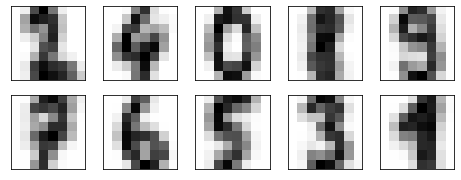

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = kmeans.cluster_centers_.reshape(10,8,8)
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8␣ matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &␣ plotting relevant centers
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
#imshow(matplotlib method) to render the image in notebook

In [ ]:
kmeans.cluster_centers_[0]

array([ 0.00000000e+00,  9.42857143e-01,  1.01885714e+01,  1.44400000e+01,
        7.77142857e+00,  9.82857143e-01, -1.33226763e-15, -2.77555756e-17,
        2.28571429e-02,  5.24000000e+00,  1.37200000e+01,  1.26228571e+01,
        1.16914286e+01,  3.23428571e+00,  1.71428571e-02,  6.93889390e-17,
        1.14285714e-02,  4.56000000e+00,  8.11428571e+00,  6.13714286e+00,
        1.21600000e+01,  3.56000000e+00,  1.71428571e-02,  1.04083409e-16,
       -1.08420217e-18,  9.65714286e-01,  2.81714286e+00,  7.00571429e+00,
        1.25371429e+01,  2.56000000e+00,  4.00000000e-02, -2.16840434e-18,
        0.00000000e+00,  4.57142857e-02,  1.57142857e+00,  9.89714286e+00,
        1.06971429e+01,  1.45142857e+00, -4.44089210e-15,  0.00000000e+00,
       -8.67361738e-18,  2.51428571e-01,  4.45714286e+00,  1.12457143e+01,
        7.74285714e+00,  2.37142857e+00,  8.45714286e-01,  1.14285714e-02,
       -6.07153217e-18,  1.19428571e+00,  1.09942857e+01,  1.37314286e+01,
        1.19257143e+01,  

In [ ]:
import numpy as np

labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(digits.target[mask])[0]

The labels are : 0

The size of labels is : ()
The mask values are : 
False
False
False
False
False
False
False
False
False
False


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

TypeError: ignored